In [1]:
# # Unit 7 | Assignment - Distinguishing Sentiments

# ## Background

# **Twitter** has become a wildly sprawling jungle of information—140 characters at a time. Somewhere between 350 million and 500 million tweets are estimated to be sent out _per day_. With such an explosion of data, on Twitter and elsewhere, it becomes more important than ever to tame it in some way, to concisely capture the essence of the data.

# Choose **one** of the following two assignments, in which you will do just that. Good luck!

# ## News Mood

# In this assignment, you'll create a Python script to perform a sentiment analysis of the Twitter activity of various news outlets, and to present your findings visually.

# Your final output should provide a visualized summary of the sentiments expressed in Tweets sent out by the following news organizations: **BBC, CBS, CNN, Fox, and New York times**.

# ![output_10_0.png](Images/output_10_0.png)

# ![output_13_1.png](Images/output_13_1.png)

# The first plot will be and/or feature the following:

# * Be a scatter plot of sentiments of the last **100** tweets sent out by each news organization, ranging from -1.0 to 1.0, where a score of 0 expresses a neutral sentiment, -1 the most negative sentiment possible, and +1 the most positive sentiment possible.
# * Each plot point will reflect the _compound_ sentiment of a tweet.
# * Sort each plot point by its relative timestamp.

# The second plot will be a bar plot visualizing the _overall_ sentiments of the last 100 tweets from each organization. For this plot, you will again aggregate the compound sentiments analyzed by VADER.

# The tools of the trade you will need for your task as a data analyst include the following: tweepy, pandas, matplotlib, and VADER.

# Your final Jupyter notebook must:

# * Pull last 100 tweets from each outlet.
# * Perform a sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet.
# * Pull into a DataFrame the tweet's source account, its text, its date, and its compound, positive, neutral, and negative sentiment scores.
# * Export the data in the DataFrame into a CSV file.
# * Save PNG images for each plot.

# As final considerations:

# * You must complete your analysis using a Jupyter notebook.
# * You must use the Matplotlib or Pandas plotting libraries.
# * Include a written description of three observable trends based on the data.
# * Include proper labeling of your plots, including plot titles (with date of analysis) and axes labels.

In [2]:
import json
import tweepy
from pprint import pprint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tweepy
import seaborn as sns
import time
from datetime import datetime

In [3]:
# Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

from config import consumer_key, consumer_secret, access_token, access_token_secret

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [4]:
target_accounts = ["@BBCWorld", "@CBSNews", "@CNN", "@FoxNews", "@nytimes"]

In [5]:
# Array to hold sentiment
sentiment_list = []
# Counter
counter = 1

# Loop through all target users
for target in target_accounts:
    
    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    tweets_ago = []
    for x in range(5):
        
        public_tweets = api.user_timeline(target, page=x)
        # Loop through all tweets 
        index = 0
        for tweet in public_tweets:
            
            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]

            
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            
            
            
            sentiment_list.append({"User": target,
                                   "Date": tweet["created_at"],
                                   "Source": tweet["source"],
                                   "Name": tweet["user"]["name"],
                                   "Screen Name":tweet["user"]["screen_name"],
                                   "Text": tweet["text"],
                                   "Compound": compound,
                                   "Positive": pos,
                                   "Negative": neu,
                                   "Neutral": neg,
                                   "Tweets Ago": len(compound_list)})
            
            index += 1

pprint(sentiment_list)


[{'Compound': -0.296,
  'Date': 'Tue Jun 04 03:09:43 +0000 2019',
  'Name': 'BBC News (World)',
  'Negative': 0.784,
  'Neutral': 0.216,
  'Positive': 0.0,
  'Screen Name': 'BBCWorld',
  'Source': '<a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a>',
  'Text': 'Queensland snowfall: Icy weather brings warnings in Australia '
          'https://t.co/KVGIj1x5IV',
  'Tweets Ago': 1,
  'User': '@BBCWorld'},
 {'Compound': -0.5994,
  'Date': 'Tue Jun 04 02:42:01 +0000 2019',
  'Name': 'BBC News (World)',
  'Negative': 0.588,
  'Neutral': 0.412,
  'Positive': 0.0,
  'Screen Name': 'BBCWorld',
  'Source': '<a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a>',
  'Text': 'Mexico-US tariffs will harm both countries, warn officials '
          'https://t.co/MFXBfC5s9U',
  'Tweets Ago': 2,
  'User': '@BBCWorld'},
 {'Compound': -0.296,
  'Date': 'Mon Jun 03 23:34:35 +0000 2019',
  'Name': 'BBC News (World)',
  'Negative': 0.82,
  'Neutral': 0.18,
  'Positive': 0.0,
  'Scr

  'Negative': 0.645,
  'Neutral': 0.177,
  'Positive': 0.177,
  'Screen Name': 'BBCWorld',
  'Source': '<a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a>',
  'Text': 'Nanda Devi: Helicopters join search for eight missing climbers '
          'https://t.co/Snge2dyKnj',
  'Tweets Ago': 80,
  'User': '@BBCWorld'},
 {'Compound': 0.0,
  'Date': 'Sun Jun 02 06:18:33 +0000 2019',
  'Name': 'BBC News (World)',
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'Screen Name': 'BBCWorld',
  'Source': '<a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a>',
  'Text': "Brexit 'causing' more British nationals to become Irish "
          'https://t.co/kBHBzd7XGO',
  'Tweets Ago': 81,
  'User': '@BBCWorld'},
 {'Compound': 0.0772,
  'Date': 'Sun Jun 02 06:02:35 +0000 2019',
  'Name': 'BBC News (World)',
  'Negative': 0.874,
  'Neutral': 0.0,
  'Positive': 0.126,
  'Screen Name': 'BBCWorld',
  'Source': '<a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a

  'Date': 'Tue Jun 04 03:30:57 +0000 2019',
  'Name': 'CBS News',
  'Negative': 0.575,
  'Neutral': 0.27,
  'Positive': 0.155,
  'Screen Name': 'CBSNews',
  'Source': '<a href="http://trueanthem.com/" rel="nofollow">trueAnthem</a>',
  'Text': 'U.S. looks to help more cancer patients access experimental drugs '
          'https://t.co/7aZ4xUfaJ9 https://t.co/5gVevLyHen',
  'Tweets Ago': 21,
  'User': '@CBSNews'},
 {'Compound': -0.4404,
  'Date': 'Tue Jun 04 03:18:32 +0000 2019',
  'Name': 'CBS News',
  'Negative': 0.805,
  'Neutral': 0.195,
  'Positive': 0.0,
  'Screen Name': 'CBSNews',
  'Source': '<a href="http://trueanthem.com/" rel="nofollow">trueAnthem</a>',
  'Text': 'Charles Manson follower Leslie Van Houten denied parole for 3rd '
          'time https://t.co/JdW6tXIHJ0 https://t.co/Bp1w7GZghL',
  'Tweets Ago': 22,
  'User': '@CBSNews'},
 {'Compound': -0.4404,
  'Date': 'Tue Jun 04 03:03:37 +0000 2019',
  'Name': 'CBS News',
  'Negative': 0.818,
  'Neutral': 0.182,
  'Positive':

  'Screen Name': 'CBSNews',
  'Source': '<a href="https://www.sprinklr.com" rel="nofollow">Sprinklr</a>',
  'Text': 'Trump reignites Twitter war with London Mayor Sadiq Khan minutes '
          'before landing in U.K., calls him a "stone cold lo… '
          'https://t.co/MmaC0asUZo',
  'Tweets Ago': 81,
  'User': '@CBSNews'},
 {'Compound': 0.7184,
  'Date': 'Mon Jun 03 12:25:23 +0000 2019',
  'Name': 'CBS News',
  'Negative': 0.769,
  'Neutral': 0.0,
  'Positive': 0.231,
  'Screen Name': 'CBSNews',
  'Source': '<a href="https://www.sprinklr.com" rel="nofollow">Sprinklr</a>',
  'Text': "On the big screen, she's a Disney princess, and in real life, "
          "Kirsten Bell is just as lovely – she's helping kids a… "
          'https://t.co/wRir0Puotu',
  'Tweets Ago': 82,
  'User': '@CBSNews'},
 {'Compound': -0.296,
  'Date': 'Mon Jun 03 12:04:50 +0000 2019',
  'Name': 'CBS News',
  'Negative': 0.855,
  'Neutral': 0.145,
  'Positive': 0.0,
  'Screen Name': 'CBSNews',
  'Source': '<a hr

  'Positive': 0.0,
  'Screen Name': 'CNN',
  'Source': '<a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a>',
  'Text': 'Apple announced that a menstrual cycle tracker will be one of the '
          'new features on the Apple Watch.\n'
          '\n'
          'Women will be a… https://t.co/JqRy1JV4ct',
  'Tweets Ago': 21,
  'User': '@CNN'},
 {'Compound': 0.0,
  'Date': 'Tue Jun 04 03:25:36 +0000 2019',
  'Name': 'CNN',
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'Screen Name': 'CNN',
  'Source': '<a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a>',
  'Text': 'Jay-Z once rapped "I\'m not a businessman, I\'m a business, man." '
          'Turns out he was right. https://t.co/8mPAHVBdt7',
  'Tweets Ago': 22,
  'User': '@CNN'},
 {'Compound': 0.0,
  'Date': 'Tue Jun 04 03:16:05 +0000 2019',
  'Name': 'CNN',
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'Screen Name': 'CNN',
  'Source': '<a href="http://www.socialflow.com" rel="nofollow

  'Negative': 0.922,
  'Neutral': 0.0,
  'Positive': 0.078,
  'Screen Name': 'CNN',
  'Source': '<a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a>',
  'Text': '"Ladies and gentlemen, I invite you all to rise and drink a toast '
          'to President and Mrs. Trump."\n'
          '\n'
          'Queen Elizabeth ho… https://t.co/4adpbjxwYc',
  'Tweets Ago': 81,
  'User': '@CNN'},
 {'Compound': 0.0,
  'Date': 'Mon Jun 03 20:40:50 +0000 2019',
  'Name': 'CNN',
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'Screen Name': 'CNN',
  'Source': '<a href="https://about.twitter.com/products/tweetdeck" '
            'rel="nofollow">TweetDeck</a>',
  'Text': "RT @CNNPolitics: Who's seated next to who at tonight’s state "
          'banquet at Buckingham Palace https://t.co/48JasX7QG2 '
          'https://t.co/lcdjRAeoNv',
  'Tweets Ago': 82,
  'User': '@CNN'},
 {'Compound': -0.1027,
  'Date': 'Mon Jun 03 20:36:01 +0000 2019',
  'Name': 'CNN',
  'Negative': 0.734,
  'Neu

  'Date': 'Thu Nov 08 08:01:00 +0000 2018',
  'Name': 'Fox News',
  'Negative': 0.704,
  'Neutral': 0.0,
  'Positive': 0.296,
  'Screen Name': 'FoxNews',
  'Source': '<a href="https://studio.twitter.com" rel="nofollow">Twitter Media '
            'Studio</a>',
  'Text': '.@jasoninthehouse: “Attorney General @jeffsessions is a patriot. He '
          'was a good Republican, and I applaud him for hi… '
          'https://t.co/MRia8l8dOM',
  'Tweets Ago': 60,
  'User': '@FoxNews'},
 {'Compound': 0.5719,
  'Date': 'Thu Nov 08 07:51:00 +0000 2018',
  'Name': 'Fox News',
  'Negative': 0.793,
  'Neutral': 0.0,
  'Positive': 0.207,
  'Screen Name': 'FoxNews',
  'Source': '<a href="https://studio.twitter.com" rel="nofollow">Twitter Media '
            'Studio</a>',
  'Text': 'Devotees lit earthen lamps in Ayodhya, India as part of Diwali '
          'celebrations, also known as a festival of lights, on… '
          'https://t.co/uWGZnrkvqD',
  'Tweets Ago': 61,
  'User': '@FoxNews'},
 {'Compoun

  'Source': '<a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a>',
  'Text': "Evening Briefing: Here's what you need to know at the end of the "
          'day https://t.co/kXwRcqJ3cP',
  'Tweets Ago': 19,
  'User': '@nytimes'},
 {'Compound': 0.0,
  'Date': 'Mon Jun 03 22:45:08 +0000 2019',
  'Name': 'The New York Times',
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'Screen Name': 'nytimes',
  'Source': '<a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a>',
  'Text': "Photos from President Trump's state visit to Britain "
          'https://t.co/6kiQpT7yc8',
  'Tweets Ago': 20,
  'User': '@nytimes'},
 {'Compound': 0.0,
  'Date': 'Tue Jun 04 03:30:06 +0000 2019',
  'Name': 'The New York Times',
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'Screen Name': 'nytimes',
  'Source': '<a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a>',
  'Text': 'In Congress, John Boehner “unalterably opposed” legalizing '
          'marijuan

  'Date': 'Mon Jun 03 13:15:08 +0000 2019',
  'Name': 'The New York Times',
  'Negative': 0.867,
  'Neutral': 0.0,
  'Positive': 0.133,
  'Screen Name': 'nytimes',
  'Source': '<a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a>',
  'Text': 'Transportation Secretary Elaine Chao has lifted the profile of her '
          "family's company, which benefits from Chinese po… "
          'https://t.co/wT6lfrWhoX',
  'Tweets Ago': 87,
  'User': '@nytimes'},
 {'Compound': 0.4939,
  'Date': 'Mon Jun 03 13:00:02 +0000 2019',
  'Name': 'The New York Times',
  'Negative': 0.873,
  'Neutral': 0.0,
  'Positive': 0.127,
  'Screen Name': 'nytimes',
  'Source': '<a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a>',
  'Text': 'RT @dougmillsnyt: .@realDonaldTrump talks to one of the Guard of '
          'Honor as he inspects the troops with Prince Charles during the '
          'Official We…',
  'Tweets Ago': 88,
  'User': '@nytimes'},
 {'Compound': 0.0,
  'Date': 'Mon Jun 03 1

In [6]:
sentiment_df = pd.DataFrame.from_dict(sentiment_list)
sentiment_df[["Compound","Date","Name","Negative","Neutral","Positive"]]


,Compound,Date,Name,Negative,Neutral,Positive
0,-0.2960,Tue Jun 04 03:09:43 +0000 2019,BBC News (World),0.784,0.216,0.000
1,-0.5994,Tue Jun 04 02:42:01 +0000 2019,BBC News (World),0.588,0.412,0.000
2,-0.2960,Mon Jun 03 23:34:35 +0000 2019,BBC News (World),0.820,0.180,0.000
3,-0.2263,Mon Jun 03 23:11:09 +0000 2019,BBC News (World),0.826,0.174,0.000
4,-0.4939,Mon Jun 03 22:29:36 +0000 2019,BBC News (World),0.686,0.314,0.000
5,-0.0258,Mon Jun 03 22:20:15 +0000 2019,BBC News (World),0.891,0.109,0.000
6,0.4404,Mon Jun 03 20:13:22 +0000 2019,BBC News (World),0.879,0.000,0.121
7,0.7964,Mon Jun 03 19:58:46 +0000 2019,BBC News (World),0.712,0.000,0.288
8,0.0000,Mon Jun 03 19:10:11 +0000 2019,BBC News (World),1.000,0.000,0.000
9,-0.3612,Mon Jun 03 19:05:35 +0000 2019,BBC News (World),0.762,0.238,0.000


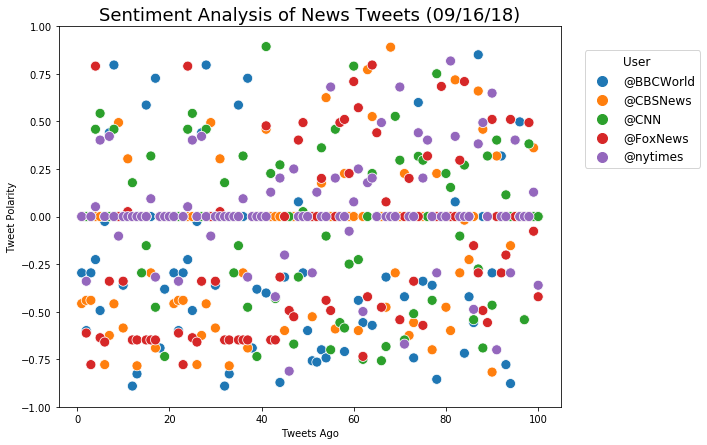

In [7]:
plt.figure(figsize= (9,7))
sns.scatterplot(x= "Tweets Ago",y="Compound", data= sentiment_df, hue="User", size = "User", sizes = (100,100))
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=2, fontsize=12 )
plt.title("Sentiment Analysis of News Tweets (09/16/18)", size=18)
plt.ylabel("Tweet Polarity")
plt.ylim(-1,1)

#name the image file to save figure 
save_image = None

if save_image is not None:
    plt.savefig(save_image)
    plt.close(save_image)
else:
    plt.show()

In [8]:
user_df = sentiment_df[["Screen Name","Date","Compound","Negative","Neutral","Positive"]]
user_groupings = user_df.loc[:,['Screen Name', 'Compound']] 


In [9]:
bbc_world = user_groupings.loc[user_groupings["Screen Name"] == "BBCWorld",:]
cbs_news = user_groupings.loc[user_groupings["Screen Name"] == "CBSNews",:]
cnn = user_groupings.loc[user_groupings["Screen Name"] == "CNN",:]
fox_news = user_groupings.loc[user_groupings["Screen Name"] == "FoxNews",:]
nytimes = user_groupings.loc[user_groupings["Screen Name"] == "nytimes",:]

bbc_frame=pd.DataFrame({"BBCWorld":bbc_world["Compound"]})
cbs_frame= pd.DataFrame({"CBSNews":cbs_news["Compound"]})
cnn_frame = pd.DataFrame({"CNN":cnn["Compound"]})
fox_frame = pd.DataFrame({"FoxNews":fox_news["Compound"]})
nytimes_frame = pd.DataFrame({"nytimes":nytimes["Compound"]})           
                  


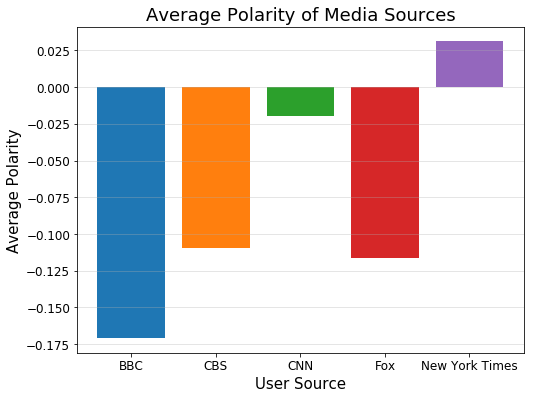

In [10]:
plt.figure(figsize= (8,6))
p1=plt.bar('BBC',bbc_frame['BBCWorld'].mean())
p2=plt.bar("CBS",cbs_frame["CBSNews"].mean())
p3=plt.bar("CNN",cnn_frame["CNN"].mean())
p4=plt.bar("Fox",fox_frame["FoxNews"].mean())
p5=plt.bar("New York Times",nytimes_frame["nytimes"].mean())

plt.xlabel("User Source", size = 15)
plt.ylabel("Average Polarity",size = 15)

plt.title("Average Polarity of Media Sources", size = 18)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.grid(True,axis="y",alpha=.40)
#name the image file to save figure 
save_image =  None

if save_image is not None:
    plt.savefig(save_image)
    plt.close(save_image)
else:
    plt.show()